# https://jakevdp.github.io/PythonDataScienceHandbook/index.html

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
xvalues=np.array([0, 1, 2, 3, 4])
yvalues=np.array([0, 1, 2, 3, 4])
xx, yy = np.meshgrid(xvalues, yvalues)
print(xx)

In [ ]:
def f(xvalues, yvalues):
    return np.sin(xvalues) ** 10 + np.cos(10 + yvalues * xvalues) * np.cos(xvalues)

In [ ]:
zz = f(xx, yy)

In [3]:
plt.contour(xx, yy, zz, colors='black');

NameError: name 'xx' is not defined

In [4]:
X = xx.flatten()
Y = yy.flatten()
Z = zz.flatten()
print(X)
print(Y)
print(Z)

NameError: name 'xx' is not defined

In [5]:
df = pd.DataFrame.from_dict(np.array([X,Y,Z]).T)
df.columns = ['x_value','y_value','z_value']
df['z_value'] = pd.to_numeric(df['z_value'])
df.head()

NameError: name 'pd' is not defined

In [6]:
df.describe()

NameError: name 'df' is not defined

In [7]:
df.plot.scatter(x='x_value', y='y_value', c='z_value', colormap='viridis');

NameError: name 'df' is not defined

In [8]:
# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

NameError: name 'MaxNLocator' is not defined

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use %matplotlib notebook rather than %matplotlib inline when running this code.

# Three-dimensional Points and Lines
The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ax.plot3D and ax.scatter3D functions. The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to Simple Line Plots and Simple Scatter Plots for more information on controlling the output. Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

In [10]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

Notice that by default, the scatter points have their transparency adjusted to give a sense of depth on the page. While the three-dimensional effect is sometimes difficult to see within a static image, an interactive view can lead to some nice intuition about the layout of the points.

# Three-dimensional Contour Plots
Analogous to the contour plots we explored in Density and Contour Plots, mplot3d contains tools to create three-dimensional relief plots using the same inputs. Like two-dimensional ax.contour plots, ax.contour3D requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we'll show a three-dimensional contour diagram of a three-dimensional sinusoidal function:

In [11]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):

In [13]:
ax.view_init(60, 35)
fig

NameError: name 'ax' is not defined

# Wireframes and Surface Plots
Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots. These take a grid of values and project it onto the specified three-dimensional surface, and can make the resulting three-dimensional forms quite easy to visualize. Here's an example of using a wireframe:

In [14]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [15]:
import numpy as np
import blaze as bl
import pandas as pd
import seaborn; seaborn.set()
from matplotlib import pyplot as plt
import time
%matplotlib inline

ModuleNotFoundError: No module named 'blaze'

## The vertical coordinate: z

$z = 0$ at sea level

But what is sea level? Determined by the **geoid**: isosurfaces of gravitational + centrifugal potential.

![geoid](https://upload.wikimedia.org/wikipedia/commons/7/78/GRACE_globe_animation.gif)

In [16]:
uri = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'

In [17]:
d = pd.read_csv(uri, parse_dates = ['time',], index_col='time')

NameError: name 'pd' is not defined

In [18]:
d.head()

NameError: name 'd' is not defined

In [19]:
d.describe()

NameError: name 'd' is not defined

In [20]:
top = d.sort_values('mag', ascending=False).head(20)
top

NameError: name 'd' is not defined

In [21]:
gb = d.groupby('mag')

NameError: name 'd' is not defined

In [22]:
#gb['depth'].count().plot() # not necessary
#d['mag'].hist(by=d['mag']) # didn't work
d.hist('mag', bins=20)
ax = plt.gca()
ax.set_yscale('log')

NameError: name 'd' is not defined

In [23]:
d.groupby(pd.Grouper(freq='1d'), axis=0)['mag'].count().plot();

NameError: name 'd' is not defined

In [24]:
d.groupby(pd.Grouper(freq='1h'), axis=0)['mag'].count().plot()

NameError: name 'd' is not defined

NameError: name 'd' is not defined

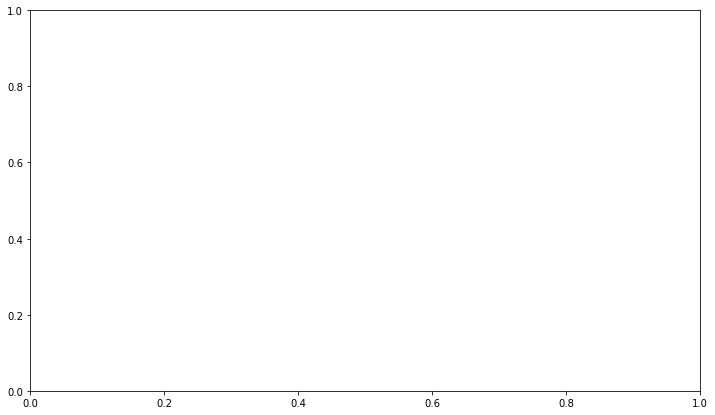

In [25]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
subplot = d.plot(kind='scatter', x='longitude', y='latitude', c='mag', ax=ax, cmap='RdBu_r')
#subplot.set_xlim([0,20])
#hbin.set_c

In [ ]:
# the data we will use is described here
# http://www.ncdc.noaa.gov/data-access/marineocean-data/extended-reconstructed-sea-surface-temperature-ersst-v4
# It is stored in the IRI data library
uri = ('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/'
      '.version4/anom/.sst/T/(days%20since%201960-01-01)/streamgridunitconvert/dods')

# open xray dataset
ds = xr.open_dataset(uri)
ds

In [ ]:
# make an exploratory plot
xr.plot.pcolormesh(ds['sst'][0,0])

## PCA Analysis of Tropical Pacific SST ##

Now we use a singular value decomposition to perform a [principal component analysis](http://iridl.ldeo.columbia.edu/dochelp/StatTutorial/SVD/) on the 2D sst fields.

In [26]:
# extract a region in space and time
sst_pac = ds.sst.sel(X=slice(120,300), Y=slice(-30,30),
                     T=slice('1950-01-1','2015-10-01'), zlev=0)

NameError: name 'ds' is not defined

In [27]:
# we will NOT subtract a monthly climatology
# we want to see the seasonal cycle emerge from our analysis
# instead just subtract the time mean
ssta_pac = sst_pac - sst_pac.mean(dim='T')

NameError: name 'sst_pac' is not defined

In [28]:
# visualize the region we're working with
ssta_pac[-1].plot.pcolormesh()

NameError: name 'ssta_pac' is not defined

In [29]:
# exract the raw data as numpy array and normalize
a = np.ma.masked_invalid(ssta_pac.values.copy()).filled(0.)
a -= a.mean()
a /= a.std()
print(a.mean(), a.std())

NameError: name 'ssta_pac' is not defined

In [30]:
# reshape the array to have one time dimension, one space dimension
Nt, Ny, Nx = a.shape
a.shape = (Nt, Ny*Nx)

NameError: name 'a' is not defined

In [31]:
# perform svd analysis
u, s, v = np.linalg.svd(a, full_matrices=False)
print(u.shape, v.shape, s.shape)
S = np.diag(s)

# reshape spatial pattern
sst_pat = np.reshape(v, (Nt,Ny,Nx))

NameError: name 'a' is not defined

NameError: name 'sst_pat' is not defined

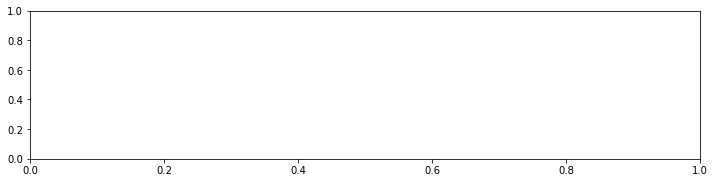

In [32]:
# look at first two eof patterns
for n in range(2):
    plt.figure(figsize=(12,6))
    plt.subplot(211)
    plt.pcolormesh(sst_pat[n], cmap='RdBu_r')
    plt.title('PCA Component %g' % n)
    plt.clim([-0.1,0.1])
    plt.subplot(212)
    plt.plot(sst_pac['T'], u[:,n])
    

In [ ]:
# magnitude of first 10 components
plt.plot(s[:10] / s.sum(),'.-')

In [ ]:
import xarray as xr
%matplotlib inline

In [ ]:
ds = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/NARR/Dailies/pressure/hgt.201810.nc')
ds

In [33]:
! wget ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc

--2019-09-01 01:26:09--  ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3/south/daily/2017/seaice_conc_daily_sh_f17_20170807_v03r01.nc
           => ‘seaice_conc_daily_sh_f17_20170807_v03r01.nc.1’
Resolving sidads.colorado.edu (sidads.colorado.edu)... 128.138.135.20
Connecting to sidads.colorado.edu (sidads.colorado.edu)|128.138.135.20|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/DATASETS/NOAA/G02202_V3/south/daily/2017 ... done.
==> SIZE seaice_conc_daily_sh_f17_20170807_v03r01.nc ... 2682793
==> PASV ... done.    ==> RETR seaice_conc_daily_sh_f17_20170807_v03r01.nc ... done.
Length: 2682793 (2.6M) (unauthoritative)

seaice_conc_daily_s 100%[===================>]   2.56M  1.18MB/s    in 2.2s    

2019-09-01 01:26:12 (1.18 MB/s) - ‘seaice_conc_daily_sh_f17_20170807_v03r01.nc.1’ saved [2682793]



# COVIS data

In [34]:
!head ../skills_building/practice_data/actualbathy.csv
#origin is covis (xyz) meters east, meters north, elevation from covis's feet. 

"East","North","Elevation"
-35,-25,9.32108797751026
-35,-24.75,9.35678729763397
-35,-24.5,9.39248661775767
-35,-24.25,9.42818593788138
-35,-24,9.50451193627917
-35,-23.75,9.44835876205719
-35,-23.5,9.42951354003562
-35,-23.25,9.42669516046128
-35,-23,9.41862489471208


In [35]:
df_bathy = pd.read_csv('../skills_building/practice_data/actualbathy.csv')
df_bathy.head()

NameError: name 'pd' is not defined

In [ ]:
df_bathy.plot.scatter(x='east', y='north', c='elevation', colormap='viridis');

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = df_bathy['elevation'].values.tolist()
xline = df_bathy['east'].values.tolist()
yline = df_bathy['north'].values.tolist()
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens');

In [ ]:
!head ../skills_building/practice_data/myXYZ_20121022T120038_ver2_050818.csv
#origin is covis (xyz) meters east, meters north, elevation from covis's feet. 

In [ ]:
df_plume = pd.read_csv('../skills_building/practice_data/myXYZ_20121022T120038_ver2_050818.csv')
df_plume.head()

In [ ]:
df_plume.plot.scatter(x='east', y='north', c='elevation', colormap='viridis');

In [ ]:
ax2 = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = df_plume['elevation'].values.tolist()
xline = df_plume['east'].values.tolist()
yline = df_plume['north'].values.tolist()
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
ax2.scatter3D(xline, yline, zline, c=zline, cmap='Greens');

In [ ]:
ax3.pcolormesh.

In [ ]:
!head ../skills_building/practice_data/APLUWCOVISMBSONAR001_20121022T124647.395Z-DIFFUSE.csv
#origin is covis (xyz) meters east, meters north, elevation from covis's feet, 1-correlations 
#higher values are interpreted as difuse flow... proportional to heat flux or temperature variance. rock... is a high correlation value. It will always correlate and be in phase
# shimmering water, bu contrast will be out of phase, so high values for 1- correlation is high. 

In [ ]:
!head ../skills_building/practice_data/covis_location_bar.csv
this is the origin... 4 is the origin 

In [ ]:
import scipy.io as sio    
mat = sio.loadmat('../skills_building/practice_data/plumedatalabeled3.mat')

In [ ]:
cardio_df = pd.DataFrame(np.hstack((mat['X'], mat['y'])))
cardio_df.head()

In [ ]:
print(mat)

In [ ]:
#!python
#!/usr/bin/env python
import tables
file = tables.openFile('../skills_building/practice_data/plumedatalabeled3.mat')